# Contents
- [Data Preprocessing](#Data-Preprocessing)
- [SVD](#svd)
- [KNN Classifier](#KNN)
- [Nearest Centroid Classifier](#Nearest-Centroid-Classifier)
- [KMeans Classifier](#KMeans-Classifier)
- [Agglomerative Classifier](#Agglomerative-Classifier)
- [Time Comparison](#Time-Comparison)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
import os

In [16]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [17]:
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

## Data Preprocessing

In [18]:
data = fetch_olivetti_faces()

In [19]:
input = data.data
target = data.target
input.shape

(400, 4096)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.3, random_state=10)
class_num = 40

## SVD

In [21]:
U,S,V = np.linalg.svd(X_train)

### Data Reconstruction

In [22]:
def reconstruction(number, image):
    """ 
    return reconstructed image using number of PCs
    param number: number of pcs
    param image: image vector
    return: image with size 64 x 64
    """
    out = V[:number].T @ V[:number] @ image
    out = out.reshape(64, 64)
    return out

def plot_reconstruction(number, image):
    """ 
    plot the reconstructed image using number of PCs
    param number: number of pcs
    param image: image vector
    """
    out = reconstruction(number, image)
    plt.imshow(out, cmap='gray')


### Scree Plot

In [77]:
total = np.sum(S)
explained_var = [val * 100 / total for val in S]
cum_explained_var = np.cumsum(explained_var)

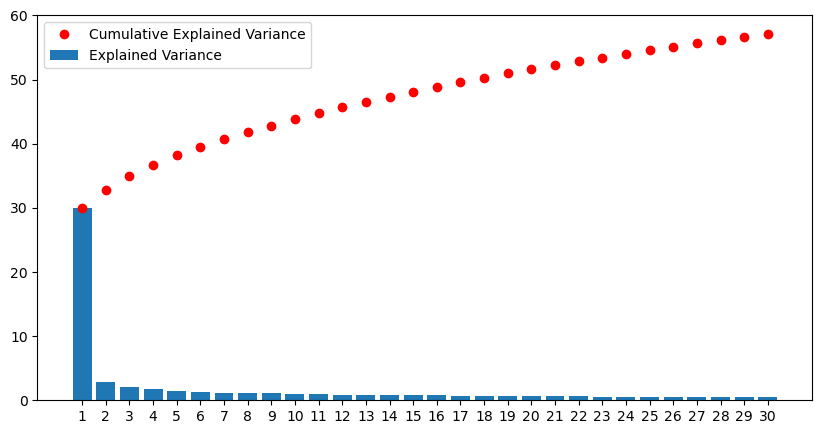

In [80]:
plt.figure(figsize=(10,5))
plt.xticks(range(1, 31))
plt.bar(range(1, 31), explained_var[:30], label='Explained Variance')
plt.plot(range(1, 31), cum_explained_var[:30], 'ro', label='Cumulative Explained Variance')
plt.legend()
plt.show()

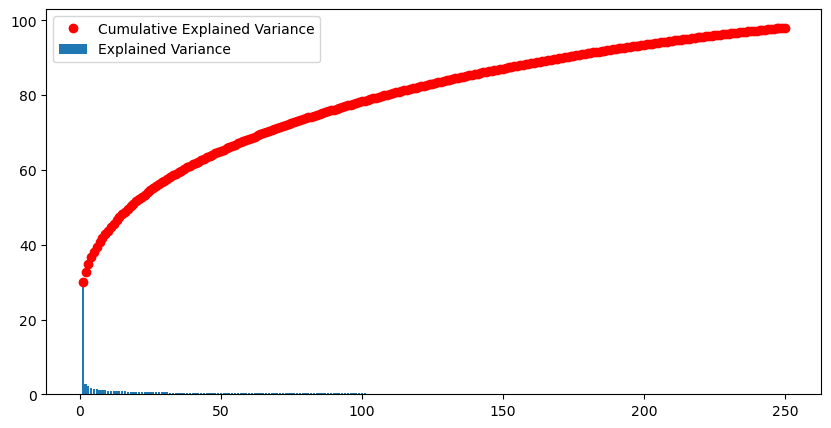

In [79]:
# 250 PC has variance over 95%
plt.figure(figsize=(10,5))
plt.bar(range(1, 251), explained_var[:250], label='Explained Variance')
plt.plot(range(1, 251), cum_explained_var[:250], 'ro', label='Cumulative Explained Variance')
plt.legend()
plt.show()

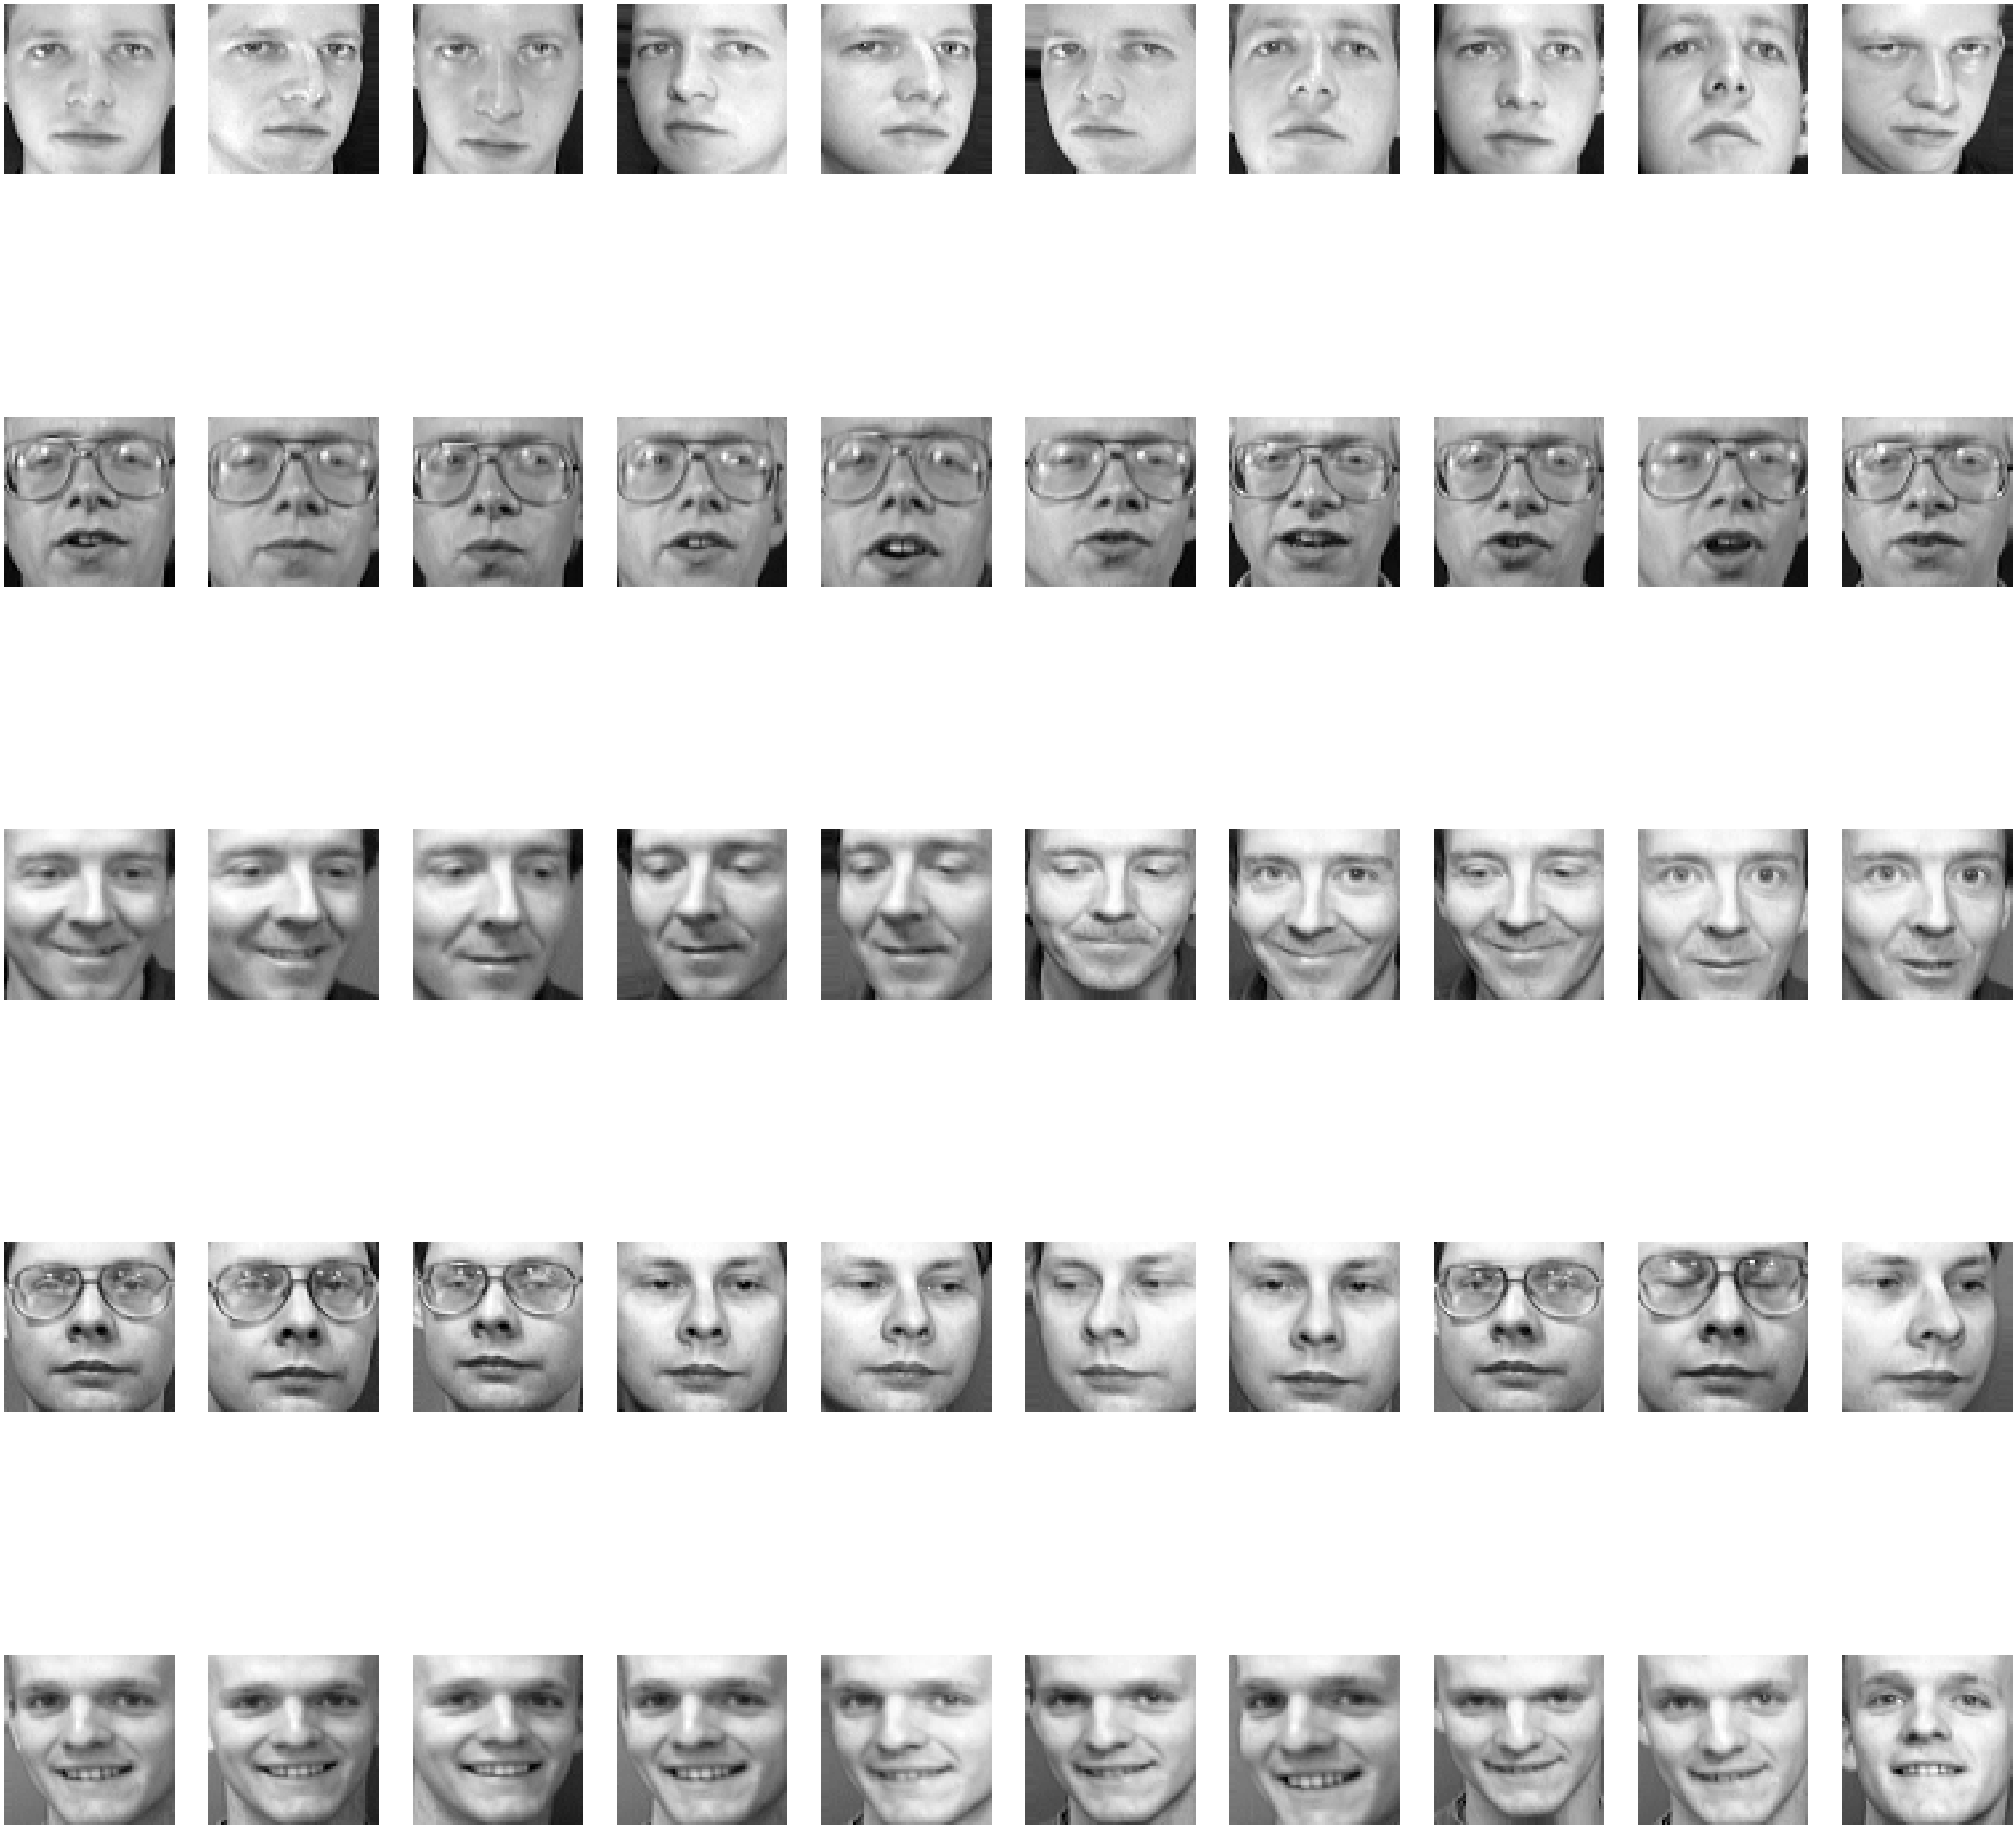

In [25]:
fig, axs = plt.subplots(5, 10, figsize=(64,64))
for i in range(0,50,10):
    for j in range(10):
        axs[i//10,j].axis('off')
        axs[i//10,j].imshow(input[i+j].reshape(64,64), cmap='gray')
plt.show()

### Reconstruction of first 10 faces with 10 PC

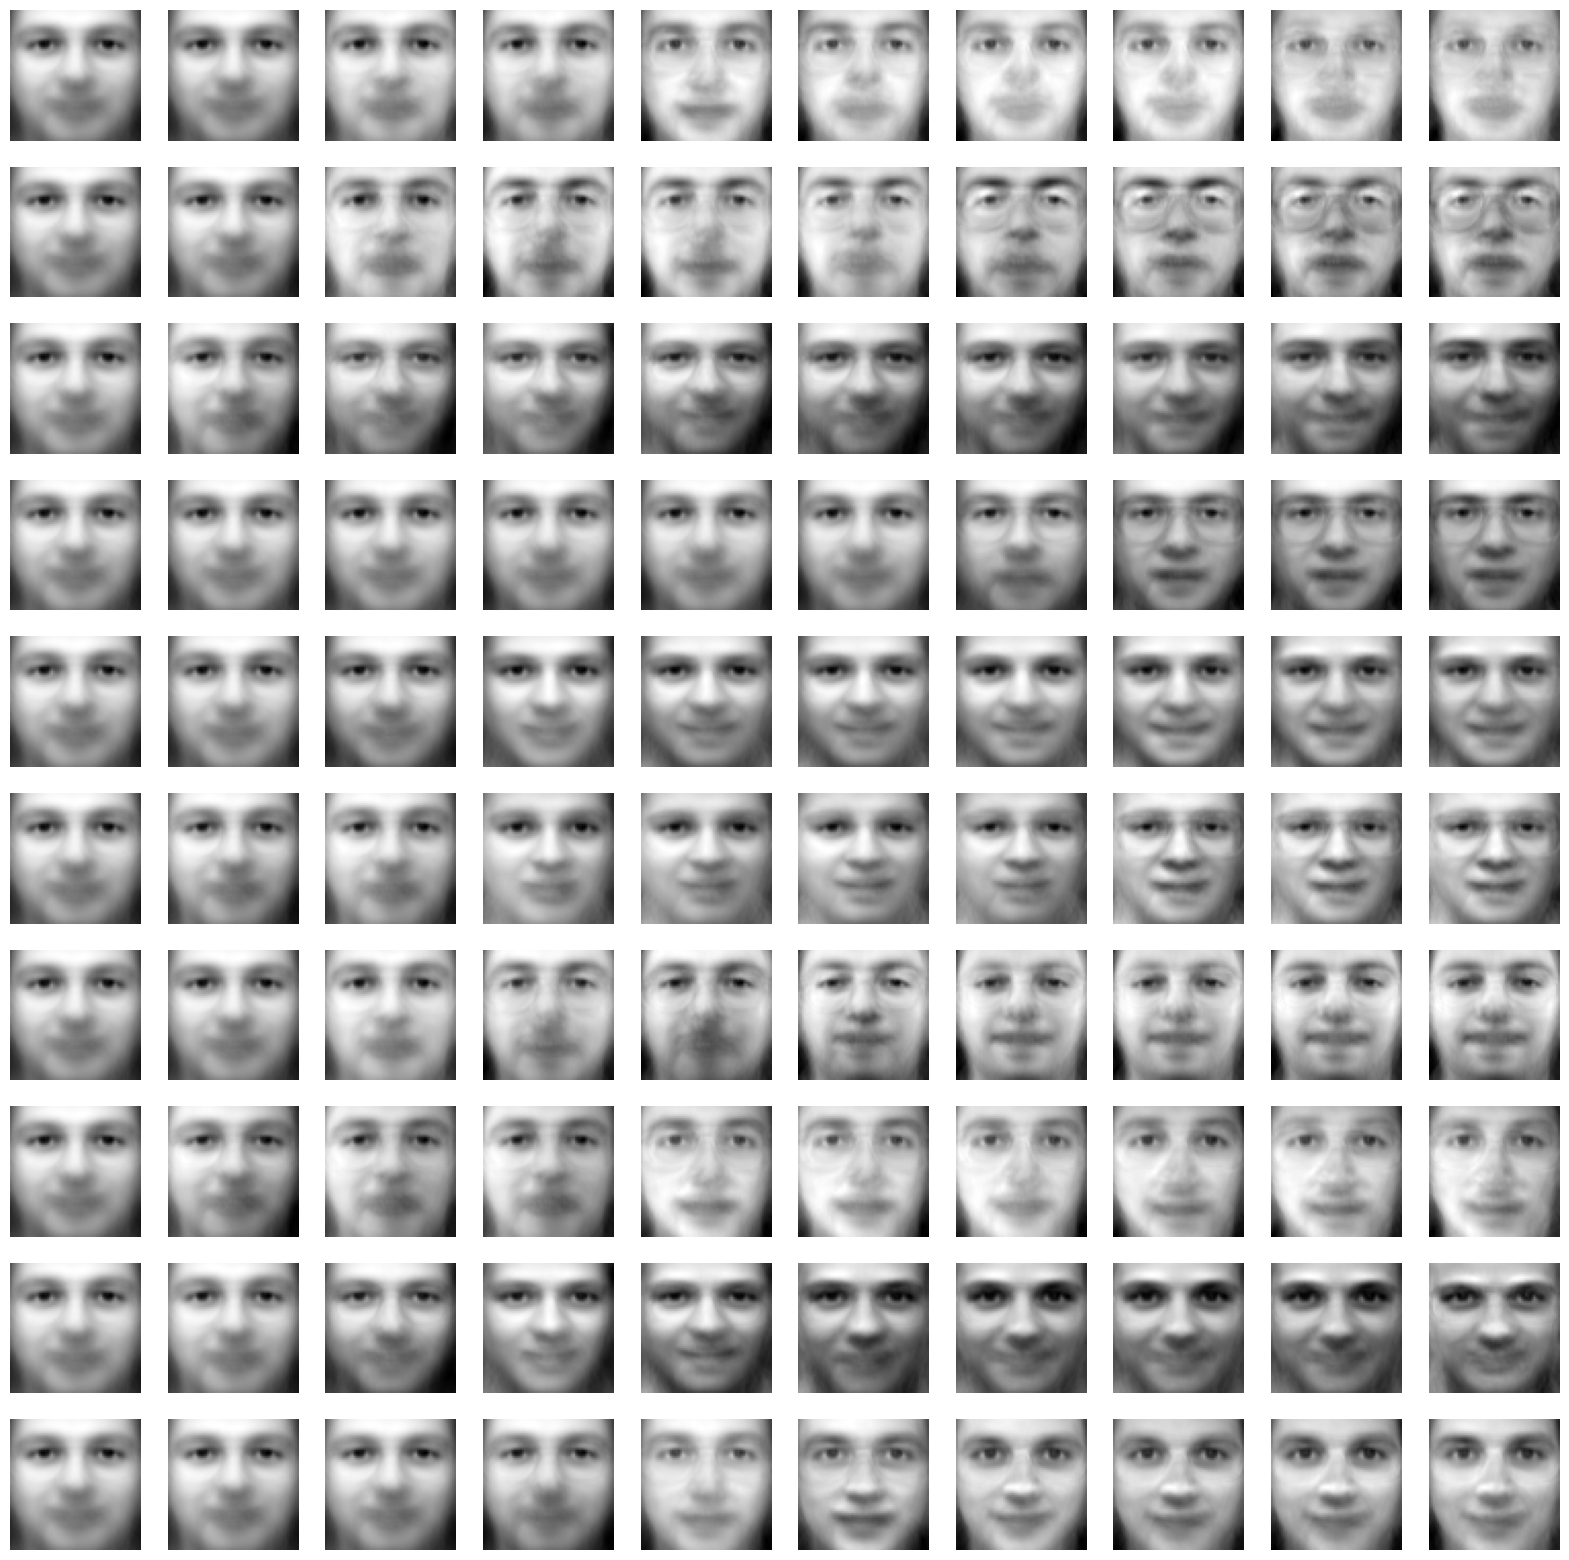

In [26]:
fig, axs = plt.subplots(10, 10, figsize=(20,20))
for i in range(0,100,10):
    for j in range(10):
        axs[i//10,j].axis('off')
        axs[i//10,j].imshow(reconstruction(j+1, input[i]), cmap='gray')
plt.show()

### Projection of first 100 datapoints onto PC1 and PC2

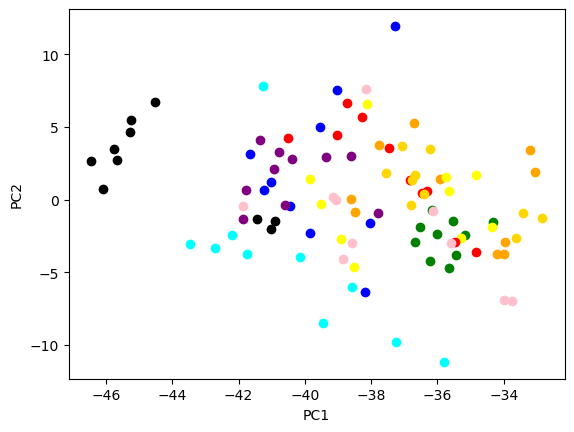

In [27]:
# Projection with only first 2 PCs
colors = ['blue', 'green', 'orange', 'yellow', 'red', 'black', 'purple', 'cyan', 'gold', 'pink']
for i, d in enumerate(input[:100]):
    x, y = V[0:2] @ d
    plt.scatter(x, y, color=colors[target[i]])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("projection.png")
plt.show()

## KNN


In [28]:
knn = KNeighborsClassifier(n_neighbors=class_num)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [29]:
# Finding the best neighbor number
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    print("Neighbor Number is {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(n, acc, precision, recall, f1))

Neighbor Number is 1  Test Accuracy is: 0.950 Precision: 0.956 Recall: 0.955 F1: 0.949
Neighbor Number is 2  Test Accuracy is: 0.825 Precision: 0.859 Recall: 0.847 F1: 0.821
Neighbor Number is 3  Test Accuracy is: 0.800 Precision: 0.837 Recall: 0.811 F1: 0.790
Neighbor Number is 4  Test Accuracy is: 0.833 Precision: 0.874 Recall: 0.849 F1: 0.829
Neighbor Number is 5  Test Accuracy is: 0.808 Precision: 0.860 Recall: 0.828 F1: 0.803
Neighbor Number is 6  Test Accuracy is: 0.775 Precision: 0.826 Recall: 0.795 F1: 0.770
Neighbor Number is 7  Test Accuracy is: 0.758 Precision: 0.816 Recall: 0.776 F1: 0.750
Neighbor Number is 8  Test Accuracy is: 0.750 Precision: 0.810 Recall: 0.769 F1: 0.739
Neighbor Number is 9  Test Accuracy is: 0.725 Precision: 0.771 Recall: 0.756 F1: 0.716
Neighbor Number is 10 Test Accuracy is: 0.692 Precision: 0.759 Recall: 0.724 F1: 0.689
Neighbor Number is 11 Test Accuracy is: 0.658 Precision: 0.731 Recall: 0.694 F1: 0.657
Neighbor Number is 12 Test Accuracy is: 0.6

In [30]:
for i in range(5,51,5):
    X_train_proj = V[:i] @ X_train.T
    X_test_proj = V[:i] @ X_test.T
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_proj.T, y_train)
    y_pred_test = knn.predict(X_test_proj.T)
    ac = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    print("PC number: {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(i, ac, precision, recall, f1))

PC number: 5  Test Accuracy is: 0.717 Precision: 0.774 Recall: 0.747 F1: 0.716
PC number: 10 Test Accuracy is: 0.825 Precision: 0.850 Recall: 0.829 F1: 0.811
PC number: 15 Test Accuracy is: 0.883 Precision: 0.926 Recall: 0.906 F1: 0.897
PC number: 20 Test Accuracy is: 0.908 Precision: 0.935 Recall: 0.922 F1: 0.913
PC number: 25 Test Accuracy is: 0.917 Precision: 0.940 Recall: 0.927 F1: 0.919
PC number: 30 Test Accuracy is: 0.925 Precision: 0.943 Recall: 0.932 F1: 0.926
PC number: 35 Test Accuracy is: 0.925 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 40 Test Accuracy is: 0.925 Precision: 0.943 Recall: 0.932 F1: 0.926
PC number: 45 Test Accuracy is: 0.925 Precision: 0.943 Recall: 0.932 F1: 0.926
PC number: 50 Test Accuracy is: 0.925 Precision: 0.945 Recall: 0.932 F1: 0.926


## Nearest Centroid Classifier


In [31]:
class NaiveClustering():
    def __init__(self) -> None:
        self._points = {}
        self._centroid = {}

    def fit(self, X, y):
        # Get data based on target
        for i, target in enumerate(y):
            if target in self._points:
                self._points[target].append(X[i])
            else:
                self._points[target] = [X[i]]

        # Calculate the mean of the clustering
        for key in self._points.keys():
            points = self._points[key]
            points = np.array(points)
            points_avg = np.average(points, axis=0)

            self._centroid[key] = points_avg

    def _predict(self, X):
        """ 
        This calculate the average of each class
        and then by calculating the distance from X to the
        centroid to predict the class
        param X: Point to predict
        return: class number
        """
        if self._points == {}:
            raise SyntaxError
        min_dist = np.inf
        min_class = None
        for key in self._centroid.keys():
            dist = euclidean_distances([self._centroid[key]], [X])
            if dist < min_dist:
                min_dist = dist
                min_class = key
        return min_class
    
    def predict(self, X):
        pred = []
        for x in X:
            pred.append(self._predict(x))
        return pred

## Using NCC


In [32]:
# With non-compressed dataset with NaiveClustering classifier
nc = NaiveClustering()
nc.fit(X_train, y_train)
accuracy_score(y_test, nc.predict(X_test))

0.8833333333333333

In [33]:
# With compressed dataset with 2 PCs
X_train_proj = V[:2] @ X_train.T
X_test_proj = V[:2] @ X_test.T
nc = NaiveClustering()
nc.fit(X_train_proj.T, y_train)
accuracy_score(y_test, nc.predict(X_test_proj.T))

0.19166666666666668

In [34]:
# Use My implementation
for i in range(5,51,5):
    X_train_proj = V[:i] @ X_train.T
    X_test_proj = V[:i] @ X_test.T
    nc = NaiveClustering()
    nc.fit(X_train_proj.T, y_train)
    ac = accuracy_score(y_test, nc.predict(X_test_proj.T))
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    print("PC number: {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(i, ac, precision, recall, f1))

PC number: 5  Test Accuracy is: 0.475 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 10 Test Accuracy is: 0.708 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 15 Test Accuracy is: 0.800 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 20 Test Accuracy is: 0.825 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 25 Test Accuracy is: 0.833 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 30 Test Accuracy is: 0.842 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 35 Test Accuracy is: 0.842 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 40 Test Accuracy is: 0.850 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 45 Test Accuracy is: 0.858 Precision: 0.945 Recall: 0.932 F1: 0.926
PC number: 50 Test Accuracy is: 0.850 Precision: 0.945 Recall: 0.932 F1: 0.926


In [35]:
# Use sklearn implementation with 2 PC
X_train_proj = V[:2] @ X_train.T
X_test_proj = V[:2] @ X_test.T
ncc = NearestCentroid()
ncc.fit(X_train_proj.T, y_train)
accuracy_score(y_test, ncc.predict(X_test_proj.T))

0.19166666666666668

In [36]:
# Use sklearn NearestCentroid
for i in range(5,51,5):
    X_train_proj = V[:i] @ X_train.T
    X_test_proj = V[:i] @ X_test.T
    nc = NearestCentroid()
    nc.fit(X_train_proj.T, y_train)
    y_pred_test = nc.predict(X_test_proj.T)
    ac = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='macro')
    recall = recall_score(y_test, y_pred_test, average='macro')
    f1 = f1_score(y_test, y_pred_test, average='macro')
    print("PC number: {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(i, ac, precision, recall, f1))

PC number: 5  Test Accuracy is: 0.475 Precision: 0.497 Recall: 0.472 F1: 0.460
PC number: 10 Test Accuracy is: 0.708 Precision: 0.670 Recall: 0.693 F1: 0.663
PC number: 15 Test Accuracy is: 0.800 Precision: 0.755 Recall: 0.791 F1: 0.762
PC number: 20 Test Accuracy is: 0.825 Precision: 0.794 Recall: 0.821 F1: 0.793
PC number: 25 Test Accuracy is: 0.833 Precision: 0.827 Recall: 0.847 F1: 0.824
PC number: 30 Test Accuracy is: 0.842 Precision: 0.854 Recall: 0.852 F1: 0.841
PC number: 35 Test Accuracy is: 0.842 Precision: 0.851 Recall: 0.852 F1: 0.839
PC number: 40 Test Accuracy is: 0.850 Precision: 0.866 Recall: 0.865 F1: 0.853
PC number: 45 Test Accuracy is: 0.858 Precision: 0.871 Recall: 0.870 F1: 0.859
PC number: 50 Test Accuracy is: 0.850 Precision: 0.866 Recall: 0.865 F1: 0.853


## KMeans Classifier


In [37]:
X_train_proj = V[:15] @ X_train.T
X_test_proj = V[:15] @ X_test.T
kmeans = KMeans(n_clusters=class_num, random_state=0)
kmeans.fit(X_train_proj.T)

KMeans(n_clusters=40, random_state=0)

In [38]:
class KMeansClassifier():
    def __init__(self, n_clusters=1, random_state=0) -> None:
        """
        @param n_clusters: number of clusters
        @param random_state: random state for KMeans
        """
        self.km = KMeans(n_clusters=n_clusters, random_state=random_state)

    def set_pc(self, pc):
        """ 
        Set the PC number, only use this on hybrid mode
        @param pc: number of Pricipal Components, only used in hybrid mode
        """
        self.pc = pc



    def fit(self, X, y):
        self.y = y
        self.x = X
        self.km.fit(X)

    def predict(self, X, regressor="lr", mode='partial'):
        """ 
        This function uses regressor to make the model 
        to predict the output label
        @param X: input data
        @param regressor: regressor type, "lr" or "dt"
        @param mode: mode for linear regressor 
        """
        # Partial Mode
        # Logistic regression with only kmeans clustering labels and target label
        if regressor == "lr" and mode=='partial':
            lr = LogisticRegression()
            lr.fit(self.x, self.km.labels_.reshape(-1,1))
            return lr.predict(X)
        
        # Full Mode
        # Logistic regression with training data + clustering labels and target label
        elif regressor == "lr" and mode=='full':
            X_ = np.vstack((self.x.T, self.km.labels_))
            lr = LogisticRegression()
            lr.fit(X_.T, self.y)
            X_km = np.vstack((X.T, self.km.predict(X)))
            return lr.predict(X_km.T)
        
        # Hybrid Mode
        # Logistics regression with partial training data + clustering labels and target label
        # Uses 30% of original training data
        # If input pc is not specified, it will perform as Full Mode
        elif regressor == 'lr' and mode=='hybrid':
            if self.pc != 0:
                x = self.x[:,:int(self.pc * 0.3)]
            else:
                x = self.x
            X_ = np.vstack((x.T, self.km.labels_))
            lr = LogisticRegression()
            lr.fit(X_.T, self.y)
            if self.pc != 0:
                X_km = np.vstack((X[:,:int(self.pc*0.3)].T, self.km.predict(X)))
            else:
                X_km = np.vstack((X.T, self.km.predict(X)))
            return lr.predict(X_km.T)
        
        # Full Mode
        # Decision Tree with trainig data + clustering labels and target labels
        elif regressor == 'dt':
            X_ = np.vstack((self.x.T, self.km.labels_))
            dt = DecisionTreeClassifier()
            dt.fit(X_.T, self.y)
            X_km = np.vstack((X.T, self.km.predict(X)))
            return dt.predict(X_km.T)
        
        # Full Mode
        # Random Forest with trainig data + clustering labels and target labels
        elif regressor == "rf":
            X_ = np.vstack((self.x.T, self.km.labels_))
            dt = RandomForestClassifier(n_estimators=10)
            dt.fit(X_.T, self.y)
            X_km = np.vstack((X.T, self.km.predict(X)))
            return dt.predict(X_km.T)
            
        else:
            raise Exception("Regressor can only be \"lr\", \"dt\", \"rf\"")


In [39]:
X_train_proj = V[:30] @ X_train.T
X_test_proj = V[:30] @ X_test.T
kmc = KMeansClassifier(n_clusters=class_num, random_state=0)
kmc.fit(X_train_proj.T, y_train)
y_pred_test = kmc.predict(X_test_proj.T, regressor="dt")
accuracy_score(y_test, y_pred_test)

0.575

In [40]:
for i in range(5,51,5):
    X_train_proj = V[:i] @ X_train.T
    X_test_proj = V[:i] @ X_test.T
    kmc = KMeansClassifier(n_clusters=class_num, random_state=0)
    kmc.fit(X_train_proj.T, y_train)
    y_pred_test = kmc.predict(X_test_proj.T, regressor="lr", mode='full')
    ac = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="macro")
    recall = recall_score(y_test, y_pred_test, average="macro")
    f1 = f1_score(y_test, y_pred_test, average="macro")
    print("PC number: {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(i, ac, precision, recall, f1))

PC number: 5  Test Accuracy is: 0.442 Precision: 0.483 Recall: 0.449 F1: 0.420
PC number: 10 Test Accuracy is: 0.775 Precision: 0.804 Recall: 0.782 F1: 0.764
PC number: 15 Test Accuracy is: 0.883 Precision: 0.884 Recall: 0.886 F1: 0.865
PC number: 20 Test Accuracy is: 0.925 Precision: 0.929 Recall: 0.924 F1: 0.921
PC number: 25 Test Accuracy is: 0.925 Precision: 0.933 Recall: 0.934 F1: 0.921
PC number: 30 Test Accuracy is: 0.942 Precision: 0.948 Recall: 0.944 F1: 0.939
PC number: 35 Test Accuracy is: 0.958 Precision: 0.957 Recall: 0.971 F1: 0.956
PC number: 40 Test Accuracy is: 0.925 Precision: 0.943 Recall: 0.938 F1: 0.929
PC number: 45 Test Accuracy is: 0.967 Precision: 0.970 Recall: 0.976 F1: 0.968
PC number: 50 Test Accuracy is: 0.967 Precision: 0.974 Recall: 0.976 F1: 0.971


## Agglomerative Classifier

In [41]:
class AgglomerativeClassifier():
    def __init__(self, n_clusters=1) -> None:
        self.agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

    def fit(self, X, y):
        self.y = y
        self.X = X
        self.agglomerative.fit(X)

    def predict(self, X, regressor="lr", mode='partial'):
        if regressor == "lr" and mode == 'partial':
            lr = LogisticRegression()
            lr.fit(self.agglomerative.fit_predict(X).reshape(-1,1), self.y.reshape(-1,1))
            return lr.predict(self.agglomerative.fit_predict(X).reshape(-1,1))
        elif regressor == "dt" and mode == 'partial':
            dt = DecisionTreeClassifier()
            dt.fit(self.agglomerative.labels_.reshape(-1,1), self.y.reshape(-1,1))
            return dt.predict(self.agglomerative.fit_predict(X).reshape(-1,1))
        elif regressor == "lr" or regressor=='dt' or regressor=='rf' and mode == 'full':
            X_ = np.vstack((self.X.T, self.agglomerative.labels_))
            lr = LogisticRegression()
            lr.fit(X_.T, self.y.reshape(-1,1))
            X_agglom = np.vstack((X.T, self.agglomerative.fit_predict(X)))
            return lr.predict(X_agglom.T)
        else:
            raise Exception("Regressor can only be \"lr\", \"dt\"")


In [42]:
for i in range(5, 51, 5):
    X_train_proj = V[:i] @ X_train.T
    X_test_proj = V[:i] @ X_test.T
    ac = AgglomerativeClassifier(n_clusters=class_num)
    ac.fit(X_train_proj.T, y_train)
    y_pred_test = ac.predict(X_test_proj.T, regressor="lr", mode='full')
    ac = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="macro")
    recall = recall_score(y_test, y_pred_test, average="macro")
    f1 = f1_score(y_test, y_pred_test, average="macro")
    print("PC number: {:<2} Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(i, ac, precision, recall, f1))

PC number: 5  Test Accuracy is: 0.367 Precision: 0.336 Recall: 0.352 F1: 0.316
PC number: 10 Test Accuracy is: 0.600 Precision: 0.594 Recall: 0.609 F1: 0.564
PC number: 15 Test Accuracy is: 0.592 Precision: 0.583 Recall: 0.567 F1: 0.539
PC number: 20 Test Accuracy is: 0.717 Precision: 0.679 Recall: 0.688 F1: 0.663
PC number: 25 Test Accuracy is: 0.817 Precision: 0.788 Recall: 0.790 F1: 0.767
PC number: 30 Test Accuracy is: 0.783 Precision: 0.793 Recall: 0.818 F1: 0.779
PC number: 35 Test Accuracy is: 0.708 Precision: 0.692 Recall: 0.731 F1: 0.675
PC number: 40 Test Accuracy is: 0.758 Precision: 0.739 Recall: 0.759 F1: 0.720
PC number: 45 Test Accuracy is: 0.858 Precision: 0.856 Recall: 0.865 F1: 0.836
PC number: 50 Test Accuracy is: 0.833 Precision: 0.829 Recall: 0.824 F1: 0.790


## Time Comparison

In [43]:
import time
# Full dataset without PCA compression with KMC
start = time.time()
kmc = KMeansClassifier(n_clusters=class_num, random_state=0)
kmc.fit(X_train, y_train)
y_pred_test = kmc.predict(X_test, regressor="lr", mode='full')
duration = time.time() - start
ac = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average="macro")
recall = recall_score(y_test, y_pred_test, average="macro")
f1 = f1_score(y_test, y_pred_test, average="macro")
print("Duration: {:.3f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(duration, ac, precision, recall, f1))


Duration: 3.264s Test Accuracy is: 0.950 Precision: 0.961 Recall: 0.956 F1: 0.955


In [44]:
# 30 PC with KMC
X_train_proj = V[:30] @ X_train.T
X_test_proj = V[:30] @ X_test.T
start = time.time()
kmc = KMeansClassifier(n_clusters=class_num, random_state=0)
kmc.fit(X_train_proj.T, y_train)
y_pred_test = kmc.predict(X_test_proj.T, regressor="lr", mode='full')
duration = time.time() - start
ac = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average="macro")
recall = recall_score(y_test, y_pred_test, average="macro")
f1 = f1_score(y_test, y_pred_test, average="macro")
print("Duration: {:.3f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(duration, ac, precision, recall, f1))

Duration: 0.087s Test Accuracy is: 0.942 Precision: 0.948 Recall: 0.944 F1: 0.939


In [45]:
# Full dataset without PCA compression with Nearest Centroid
start = time.time()
nc = NearestCentroid()
nc.fit(X_train, y_train)
y_pred_test = nc.predict(X_test)
duration = time.time() - start
ac = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')
print("Duration: {:.3f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(duration, ac, precision, recall, f1))

Duration: 0.014s Test Accuracy is: 0.883 Precision: 0.891 Recall: 0.894 F1: 0.882


In [46]:
# 30 PC with NC
X_train_proj = V[:30] @ X_train.T
X_test_proj = V[:30] @ X_test.T
start = time.time()
nc = NearestCentroid()
nc.fit(X_train_proj.T, y_train)
y_pred_test = nc.predict(X_test_proj.T)
duration = time.time() - start
ac = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average="macro")
recall = recall_score(y_test, y_pred_test, average="macro")
f1 = f1_score(y_test, y_pred_test, average="macro")
print("Duration: {:.3f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(duration, ac, precision, recall, f1))

Duration: 0.004s Test Accuracy is: 0.842 Precision: 0.854 Recall: 0.852 F1: 0.841


In [47]:
def time_function(pc=0, classifier="KNN", regressor='lr', mode="full"):
    """ 
    This is a functino to test the time of each classification method
    @param pc: Number of Pricipal Components will be used
    @param classifier: Type of classifier to be tested, "KNN", "KM", "NC", "AC"
    @param regressor: Type of regressor will be used in kmeans, "LR", "DT", "RF"
    @param mode: Mode will be used in Kmeans. "FULL", "PARTIAL", "HYBRID"
    """
    if classifier == "NC":
        model = NearestCentroid()
    elif classifier == "KM":
        model = KMeansClassifier(n_clusters=40, random_state=0)
    elif classifier == "AC":
        model = AgglomerativeClassifier(n_clusters=40)
    else:
        model = KNeighborsClassifier(n_neighbors=1)
    
    if pc > 0:
        X_train_ = (V[:pc] @ X_train.T).T
        X_test_ = (V[:pc] @ X_test.T).T
    else:
        X_train_ = X_train
        X_test_ = X_test
    start = time.time()
    model.fit(X_train_, y_train)
    if classifier=='KM' or classifier == "AC":
        # start = time.time()
        if mode == 'hybrid':
            model.set_pc(pc)
        y_pred_test = model.predict(X_test_, regressor=regressor, mode=mode)
        duration = time.time() - start
    else:
        # start = time.time()
        y_pred_test = model.predict(X_test_)
        duration = time.time() - start
    ac = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="macro")
    recall = recall_score(y_test, y_pred_test, average="macro")
    f1 = f1_score(y_test, y_pred_test, average="macro")
    acc_class = {label: accuracy_score(y_test == label, y_pred_test == label) for label in y_test}
    return ac, precision, recall, f1, duration, acc_class

In [48]:
for pc in [0, 5, 10, 30, 200]:
    if pc != 0:
        print("Result on Compressed Data With {} PC".format(pc))
    else:
        print("Result on Full Dataset")
    for model in ["KNN", "NC", "KM", "AC"]:
        ac, precision, recall, f1, duration, acc_class = time_function(pc, model)
        print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format(model, duration, ac, precision, recall, f1))

Result on Full Dataset
Model KNN Duration: 0.03713s Test Accuracy is: 0.950 Precision: 0.956 Recall: 0.955 F1: 0.949
Model NC Duration: 0.00798s Test Accuracy is: 0.883 Precision: 0.891 Recall: 0.894 F1: 0.882
Model KM Duration: 3.16596s Test Accuracy is: 0.950 Precision: 0.961 Recall: 0.956 F1: 0.955
Model AC Duration: 3.36714s Test Accuracy is: 0.825 Precision: 0.806 Recall: 0.851 F1: 0.815
Result on Compressed Data With 5 PC
Model KNN Duration: 0.01400s Test Accuracy is: 0.717 Precision: 0.774 Recall: 0.747 F1: 0.716
Model NC Duration: 0.00521s Test Accuracy is: 0.475 Precision: 0.497 Recall: 0.472 F1: 0.460
Model KM Duration: 0.05970s Test Accuracy is: 0.442 Precision: 0.483 Recall: 0.449 F1: 0.420
Model AC Duration: 0.04479s Test Accuracy is: 0.367 Precision: 0.336 Recall: 0.352 F1: 0.316
Result on Compressed Data With 10 PC
Model KNN Duration: 0.00960s Test Accuracy is: 0.825 Precision: 0.850 Recall: 0.829 F1: 0.811
Model NC Duration: 0.00499s Test Accuracy is: 0.708 Precision: 0

In [50]:
ac, precision, recall, f1, duration, acc_class = time_function(5, "KM", regressor="lr", mode='full')

print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("KM", duration, ac, precision, recall, f1))

Model KM Duration: 0.06183s Test Accuracy is: 0.442 Precision: 0.483 Recall: 0.449 F1: 0.420


In [51]:
ac, precision, recall, f1, duration, acc_class = time_function(5, "KM", regressor="lr", mode='partial')

print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("KM", duration, ac, precision, recall, f1))

Model KM Duration: 0.05490s Test Accuracy is: 0.017 Precision: 0.006 Recall: 0.030 F1: 0.009


In [52]:
ac, precision, recall, f1, duration, acc_class = time_function(5, "KM", regressor="lr", mode='hybrid')

print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("KM", duration, ac, precision, recall, f1))

here
Model KM Duration: 0.04612s Test Accuracy is: 0.200 Precision: 0.123 Recall: 0.217 F1: 0.150


In [53]:
ac, precision, recall, f1, duration, acc_class = time_function(5, "KM", regressor="dt")

print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("KM", duration, ac, precision, recall, f1))

Model KM Duration: 0.01496s Test Accuracy is: 0.533 Precision: 0.570 Recall: 0.557 F1: 0.523


In [54]:
ac, precision, recall, f1, duration, acc_class = time_function(5, "KM", regressor="rf")

print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("KM", duration, ac, precision, recall, f1))

Model KM Duration: 0.03191s Test Accuracy is: 0.608 Precision: 0.594 Recall: 0.627 F1: 0.588


In [49]:
pc5_f1 = [0.420,0.009,0.150,0.474,0.613]
pc10_f1 = [0.764,0,0.218,0.541,0.717]
pc30_f1 = [0.939,0.007,0.771,0.544,0.677]

pc5_time = [0.04989,0.05386,0.04249,0.01393,0.02995]
pc10_time = [0.04291,0.04787,0.04468,0.01664,0.03388]
pc30_time = [0.05785,0.05963,0.05086,0.02593,0.03989]
for pc in [5, 10, 30, 200]:
    print("PC ", pc)
    ac, precision, recall, f1, duration, _ = time_function(pc, "KM", regressor="lr", mode='full')

    print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("LR FULL", duration, ac, precision, recall, f1))

    ac, precision, recall, f1, duration, _ = time_function(pc, "KM", regressor="lr", mode='partial')

    print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("LR PARTIAL", duration, ac, precision, recall, f1))

    ac, precision, recall, f1, duration, acc_class = time_function(pc, "KM", regressor="lr", mode='hybrid')

    print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("LR HYBRID", duration, ac, precision, recall, f1))

    ac, precision, recall, f1, duration, acc_class = time_function(pc, "KM", regressor="dt")

    print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("DT FULL", duration, ac, precision, recall, f1))

    ac, precision, recall, f1, duration, acc_class = time_function(pc, "KM", regressor="rf")

    print("Model {} Duration: {:.5f}s Test Accuracy is: {:.3f} Precision: {:.3f} Recall: {:.3f} F1: {:.3f}".format("RF FULL", duration, ac, precision, recall, f1))

PC  5
Model LR FULL Duration: 0.05436s Test Accuracy is: 0.442 Precision: 0.483 Recall: 0.449 F1: 0.420
Model LR PARTIAL Duration: 0.04887s Test Accuracy is: 0.017 Precision: 0.006 Recall: 0.030 F1: 0.009
Model LR HYBRID Duration: 0.04293s Test Accuracy is: 0.200 Precision: 0.123 Recall: 0.217 F1: 0.150
Model DT FULL Duration: 0.01396s Test Accuracy is: 0.517 Precision: 0.521 Recall: 0.527 F1: 0.495
Model RF FULL Duration: 0.03092s Test Accuracy is: 0.625 Precision: 0.687 Recall: 0.640 F1: 0.619
PC  10
Model LR FULL Duration: 0.04434s Test Accuracy is: 0.775 Precision: 0.804 Recall: 0.782 F1: 0.764
Model LR PARTIAL Duration: 0.05040s Test Accuracy is: 0.000 Precision: 0.000 Recall: 0.000 F1: 0.000
Model LR HYBRID Duration: 0.04291s Test Accuracy is: 0.267 Precision: 0.226 Recall: 0.254 F1: 0.218
Model DT FULL Duration: 0.01692s Test Accuracy is: 0.583 Precision: 0.594 Recall: 0.563 F1: 0.549
Model RF FULL Duration: 0.03472s Test Accuracy is: 0.750 Precision: 0.734 Recall: 0.732 F1: 0.7

In [50]:
pc5_f1 = [0.420,0.009,0.150,0.474,0.613]
pc10_f1 = [0.764,0,0.218,0.541,0.717]
pc30_f1 = [0.939,0.007,0.771,0.544,0.677]
pc200_f1 = [0.958,0.084,0.958,0.547,0.536]

pc5_time = [0.04989,0.05386,0.04249,0.01393,0.02995]
pc10_time = [0.04291,0.04787,0.04468,0.01664,0.03388]
pc30_time = [0.05785,0.05963,0.05086,0.02593,0.03989]
pc200_time = [0.13963,0.14096,0.07547,0.11652,0.07912]

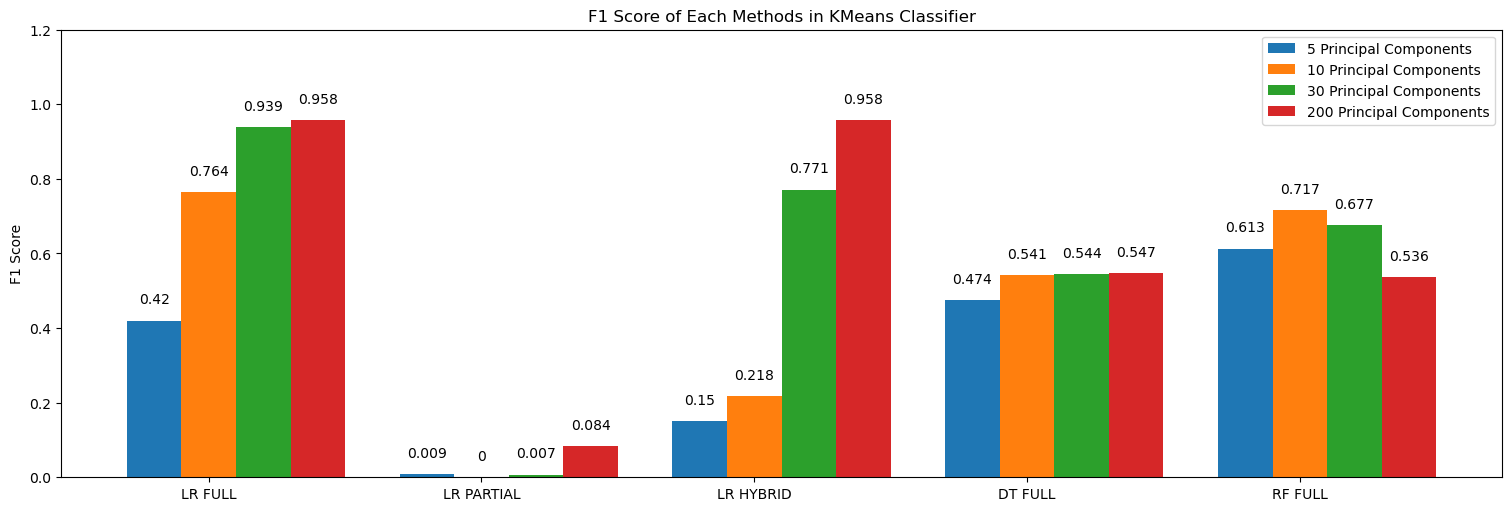

In [65]:

width = 0.2
x = np.arange(5)
multiplier = 0
f1s = {"5 Principal Components":pc5_f1, "10 Principal Components":pc10_f1, "30 Principal Components":pc30_f1, "200 Principal Components":pc200_f1}
fig, ax = plt.subplots(layout='constrained', figsize=(15,5))
for pc, f1 in f1s.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, f1, width, label=pc)
    ax.bar_label(rects, padding=10)
    multiplier += 1
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score of Each Methods in KMeans Classifier")
ax.set_xticks(x+width, ["LR FULL", "LR PARTIAL", "LR HYBRID", "DT FULL", "RF FULL"])
ax.legend(loc='upper right')
ax.set_ylim(0,1.2)
plt.savefig("km_f1.png")
plt.show()

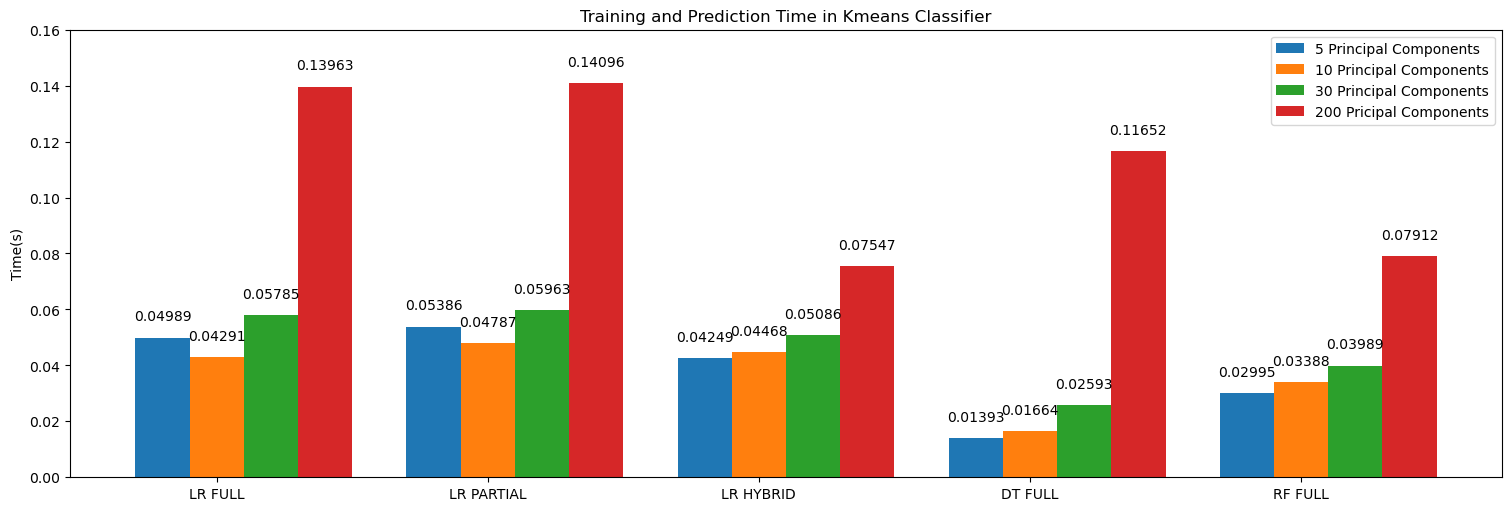

In [66]:
width = 0.2
x = np.arange(5)
multiplier = 0
f1s = {"5 Principal Components":pc5_time, "10 Principal Components":pc10_time, "30 Principal Components":pc30_time, "200 Pricipal Components":pc200_time}
fig, ax = plt.subplots(layout='constrained', figsize=(15,5))
for pc, f1 in f1s.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, f1, width, label=pc)
    ax.bar_label(rects, padding=10)
    multiplier += 1
ax.set_ylabel("Time(s)")
ax.set_title("Training and Prediction Time in Kmeans Classifier")
ax.set_xticks(x+width, ["LR FULL", "LR PARTIAL", "LR HYBRID", "DT FULL", "RF FULL"])
ax.legend(loc='upper right')
ax.set_ylim(0,0.16)
plt.savefig('km_time.png')
plt.show()